**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import  fetch_20newsgroups #fetch_mldata
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import euclidean, cdist
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import pairwise_distances


##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [2]:
iris = datasets.load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [4]:
class MyKNeighborsClassifier(BaseEstimator):
    alg = True
    metric = True
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n = n_neighbors
        if algorithm != 'brute':
            self.alg = False
        if metric != 'euclidean':
            self.metric = False
    
    def fit(self, X, y):
        self.points = X
        self.labels = y
        if not self.alg:
            self.t = np.unique(y).shape[0]
            self.tree = KDTree(X)

    def predict(self, X):
        if self.alg:
            if self.metric:
                dist = pairwise_distances(X, self.points, metric='euclidean')
            else:
                dist = pairwise_distances(X, self.points, metric='cosine')
            ind = np.argpartition(dist,self.n)[:, :self.n]
            return np.apply_along_axis(lambda x: np.bincount(x).argmax(), 1, self.labels[ind])
        else:
            _, ind = self.tree.query(X, k = self.n)
            return np.apply_along_axis(lambda x: np.bincount(x).argmax(),1, self.labels[ind])

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
my_clf_pred = my_clf.predict(X_test)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 2.39 ms, sys: 2.18 ms, total: 4.57 ms
Wall time: 2.81 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 13.6 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 4.2 ms, sys: 2.6 ms, total: 6.81 ms
Wall time: 4.86 ms


array([0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 2.83 ms, sys: 0 ns, total: 2.83 ms
Wall time: 1.84 ms


array([0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 5.91 ms, sys: 471 µs, total: 6.38 ms
Wall time: 5.47 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 489 µs, sys: 0 ns, total: 489 µs
Wall time: 318 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 3.32 ms, sys: 161 µs, total: 3.48 ms
Wall time: 2.53 ms


array([2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 2.19 ms, sys: 2.56 ms, total: 4.75 ms
Wall time: 3 ms


array([2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [35]:
vectorizer=CountVectorizer(min_df=0.005, max_df=0.9)
temp = vectorizer.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [36]:
kf = KFold(n_splits=3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [37]:
def values(data, target, m, n, start=1, delta=1):
    y = np.array([])
    tempScore = 0
    for j in range(start,n + 1,delta):
        tempScore = 0
        for train, test in kf.split(target):
            X_train = (data[train] - np.mean(data[train],axis=0))/np.std(data[train],axis=0)
            y_train = target[train]
            X_test = (data[test] - np.mean(data[test],axis=0))/np.std(data[test],axis=0)
            y_test = target[test]
            clf = MyKNeighborsClassifier(n_neighbors = j, algorithm = 'brute', metric = m)
            clf.fit(X_train, y_train)
            t = accuracy_score(clf.predict(X_test), y_test)
            tempScore += t 
        y = np.append(y, tempScore / 3)
    return y

k = 1


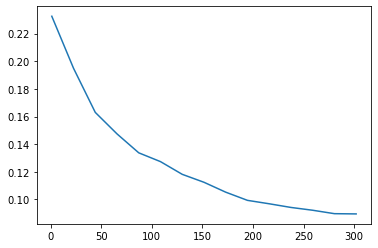

In [38]:
n1 = 300
start1 = 1 
delta1 = 20 
fig = plt.figure()
x1 = np.linspace(start1, n1 + 2, int(n1 / delta1))
y1 = values(temp, target, 'euclidean', n1, start1, delta1)
ax1 = plt.plot(x1, y1)
print("k =", y1.argmax() + 1)


Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

k = 4


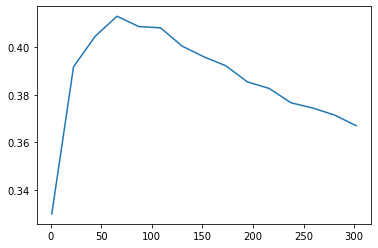

In [39]:
n2 = 300
start2 = 1
delta2 = 20
fig = plt.figure()
x2 = np.linspace(start2, n2 + 2, int(n2 / delta2))
y2 = values(temp, target, 'cosine', n2, start2, delta2)
ax1 = plt.plot(x2, y2)
print("k =", y2.argmax() + 1)

In [40]:
vectorizer1 = TfidfVectorizer(min_df=0.005, max_df=0.9)
temp2 = vectorizer1.fit_transform(data).toarray()

k = 24


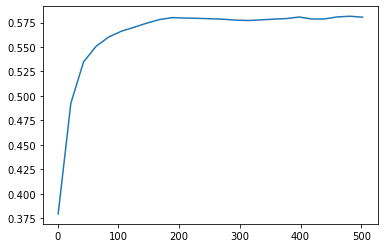

In [41]:
n3 = 500
start3 = 1
delta3 = 20
fig = plt.figure()
x3 = np.linspace(start3, n3 + 2, int(n3 / delta3))
y3 = values(temp2, target, 'cosine', n3, start3, delta3)
ax1 = plt.plot(x3, y3)
print("k =", y3.argmax() + 1)

Для самой хорошей модели: cosine+Tfldf было рассмотрено большее число соседей.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [42]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
names = np.array(vectorizer1.get_feature_names())
data1 = newsgroups['data']
target1 = newsgroups['target']
vectorizer2 = TfidfVectorizer(vocabulary=names, min_df=0.005, max_df=0.9)
temp3 = vectorizer2.fit_transform(data1).toarray()
temp3 = (temp3 - np.mean(temp3,axis=0)) / np.std(temp3,axis=0)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [43]:
my_clf = MyKNeighborsClassifier(n_neighbors=480, algorithm='brute', metric = 'cosine')
temp21 = (temp2 - np.mean(temp2,axis=0)) / np.std(temp2,axis=0)
my_clf.fit(temp2, target)
my_clf_pred = my_clf.predict(temp3)
print('score = ', accuracy_score(my_clf_pred, target1))

score =  0.5560276155071694


Качество на тестовой выборке ожидаемо стало меньше, это связано с тем, что мы в любом случае переобучаемся на тренировочной выборке (параметры подстраивались под наилучшее качество на тестовой выборке), тем временем в обучающей и тестовых выборках рассматриваются разные тексты с разными наборами слов в разных порядках, понятно, что слова, большие подходившие по смыслу в первом тексте могут меньше подходить во втором.